In [3]:
from PIL import Image
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import requests

In [4]:
dataDir = '../annotations/annotations_trainval2014'
dataType = 'val2014'
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.54s)
creating index...
index created!


In [15]:
img_ids = [75563, 151524, 559656, 302030, 212573]

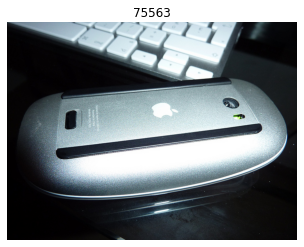

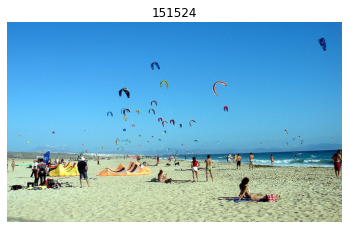

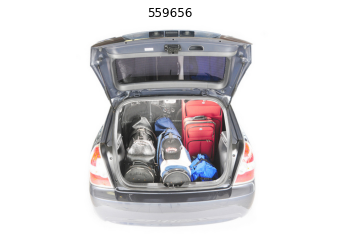

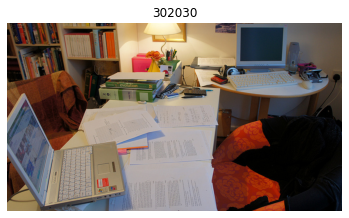

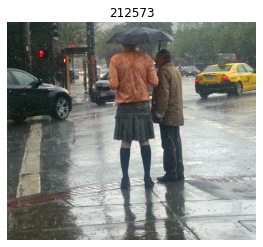

In [16]:
for img_id in img_ids:
    url = coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)
    plt.axis('off')
    plt.title(img_id)
    plt.imshow(raw_img)
    plt.show()

In [14]:
test = {'a':1, 'b':2, 'c':3}
list(test.keys())[:2]

['a', 'b']